In [230]:
import numpy as np
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt
import requests
import datetime as dt
from pandas import DataFrame
plt.rc('font', family='Malgun Gothic')
import pickle
from tqdm.notebook import tqdm
import re
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [322]:
df = pd.read_excel('/content/drive/My Drive/BigCon_BiKong/외부데이터/연령별 지역별 감염병 데이터/total.xlsx')
# df.iloc[:,4:].replace("-","0")
df

,Unnamed: 0,기간,지역,구분,1급,1급.1,1급.2,1급.3,1급.4,1급.5,1급.6,1급.7,1급.8,1급.9,1급.10,1급.11,1급.12,1급.13,1급.14,1급.15,1급.16,2급,2급.1,2급.2,2급.3,2급.4,2급.5,2급.6,2급.7,2급.8,2급.9,2급.10,2급.11,2급.12,2급.13,2급.14,2급.15,2급.16,2급.17,2급.18,2급.19,2급.20,2급.21,3급,3급.1,3급.2,3급.3,3급.4,3급.5,3급.6,3급.7,3급.8,3급.9,3급.10,3급.11,3급.12,3급.13,3급.14,3급.15,3급.16,3급.17,3급.18,3급.19,3급.20,3급.21,3급.22
0,0,기간,지역,구분,에볼라바이러스병,마버그열,라싸열,크리미안콩고출혈열,남아메리카출혈열,리프트밸리열,두창,페스트,탄저,보툴리눔독소증,야토병,신종감염병증후군,중증급성호흡기증후군(SARS),중동호흡기증후군(MERS),동물인플루엔자 인체감염증,신종인플루엔자,디프테리아,수두,홍역,콜레라,장티푸스,파라티푸스,세균성이질,장출혈성대장균감염증,A형간염,백일해,유행성이하선염,풍진(2018년이전),풍진(선천성),풍진(후천성),폴리오,수막구균 감염증,b형헤모필루스인플루엔자,폐렴구균 감염증,한센병,성홍열,반코마이신내성황색포도알균(VRSA) 감염증,카바페넴내성장내세균속균종(CRE) 감염증,E형간염,파상풍,B형간염,일본뇌염,C형간염,말라리아,레지오넬라증,비브리오패혈증,발진티푸스,발진열,쯔쯔가무시증,렙토스피라증,브루셀라증,공수병,신증후군출혈열,크로이츠펠트-야콥병(CJD) 및 변종크로이츠펠트-야콥병(vCJD),황열,뎅기열,큐열,웨스트나일열,라임병,진드기매개뇌염,유비저,치쿤구니야열
1,1,2010-01-01 ~ 2010-01-31,"강원, 전체",0~9세,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89.76,0,0,0,0,0,0,0,0,0.72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2010-01-01 ~ 2010-01-31,"강원, 전체",10~19세,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.52,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,2010-01-01 ~ 2010-01-31,"강원, 전체",20~29세,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,2010-01-01 ~ 2010-01-31,"강원, 전체",30~39세,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17436,17445,2020-01-01 ~ 2020-01-31,"대구, 전체",30~39세,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.56,0,0,0,0,0,0.32,0.32,0,0.64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17437,17446,2020-01-01 ~ 2020-01-31,"대구, 전체",40~49세,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.01,0,0,0,0.25,0,0,0.5,0,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0.25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17438,17447,2020-01-01 ~ 2020-01-31,"대구, 전체",50~59세,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.23,0,0,0,0,0,0,0.7,0,0,0,0,0,0,0,0,0.23,0,0,0,0,0,0,0,0,4.42,0,0.23,0,0,0,0,0.23,0,0,0,0,0,0.23,0,0,0,0,0,0
17439,17448,2020-01-01 ~ 2020-01-31,"대구, 전체",60~69세,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [326]:
df.columns = df.loc[0]

In [328]:
new = df[1:]
new = new[['기간', '지역', '구분', '에볼라바이러스병', '마버그열', '라싸열', '크리미안콩고출혈열', '남아메리카출혈열', '리프트밸리열', '두창', '페스트', '탄저', '보툴리눔독소증', '야토병', '신종감염병증후군', '중증급성호흡기증후군(SARS)', '중동호흡기증후군(MERS)', '동물인플루엔자 인체감염증', '신종인플루엔자', '디프테리아', '수두', '홍역', '콜레라', '장티푸스', '파라티푸스', '세균성이질', '장출혈성대장균감염증', 'A형간염', '백일해', '유행성이하선염', '풍진(2018년이전)', '풍진(선천성)', '풍진(후천성)', '폴리오', '수막구균 감염증', 'b형헤모필루스인플루엔자', '폐렴구균 감염증', '한센병', '성홍열', '반코마이신내성황색포도알균(VRSA) 감염증', '카바페넴내성장내세균속균종(CRE) 감염증', 'E형간염', '파상풍', 'B형간염', '일본뇌염', 'C형간염', '말라리아', '레지오넬라증', '비브리오패혈증', '발진티푸스', '발진열', '쯔쯔가무시증', '렙토스피라증', '브루셀라증', '공수병', '신증후군출혈열', '크로이츠펠트-야콥병(CJD) 및 변종크로이츠펠트-야콥병(vCJD)', '황열', '뎅기열', '큐열', '웨스트나일열', '라임병', '진드기매개뇌염', '유비저', '치쿤구니야열']]
new

,기간,지역,구분,에볼라바이러스병,마버그열,라싸열,크리미안콩고출혈열,남아메리카출혈열,리프트밸리열,두창,페스트,탄저,보툴리눔독소증,야토병,신종감염병증후군,중증급성호흡기증후군(SARS),중동호흡기증후군(MERS),동물인플루엔자 인체감염증,신종인플루엔자,디프테리아,수두,홍역,콜레라,장티푸스,파라티푸스,세균성이질,장출혈성대장균감염증,A형간염,백일해,유행성이하선염,풍진(2018년이전),풍진(선천성),풍진(후천성),폴리오,수막구균 감염증,b형헤모필루스인플루엔자,폐렴구균 감염증,한센병,성홍열,반코마이신내성황색포도알균(VRSA) 감염증,카바페넴내성장내세균속균종(CRE) 감염증,E형간염,파상풍,B형간염,일본뇌염,C형간염,말라리아,레지오넬라증,비브리오패혈증,발진티푸스,발진열,쯔쯔가무시증,렙토스피라증,브루셀라증,공수병,신증후군출혈열,크로이츠펠트-야콥병(CJD) 및 변종크로이츠펠트-야콥병(vCJD),황열,뎅기열,큐열,웨스트나일열,라임병,진드기매개뇌염,유비저,치쿤구니야열
1,2010-01-01 ~ 2010-01-31,"강원, 전체",0~9세,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89.76,0,0,0,0,0,0,0,0,0.72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2010-01-01 ~ 2010-01-31,"강원, 전체",10~19세,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.52,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2010-01-01 ~ 2010-01-31,"강원, 전체",20~29세,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2010-01-01 ~ 2010-01-31,"강원, 전체",30~39세,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2010-01-01 ~ 2010-01-31,"강원, 전체",40~49세,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17436,2020-01-01 ~ 2020-01-31,"대구, 전체",30~39세,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.56,0,0,0,0,0,0.32,0.32,0,0.64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17437,2020-01-01 ~ 2020-01-31,"대구, 전체",40~49세,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.01,0,0,0,0.25,0,0,0.5,0,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0.25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17438,2020-01-01 ~ 2020-01-31,"대구, 전체",50~59세,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.23,0,0,0,0,0,0,0.7,0,0,0,0,0,0,0,0,0.23,0,0,0,0,0,0,0,0,4.42,0,0.23,0,0,0,0,0.23,0,0,0,0,0,0.23,0,0,0,0,0,0
17439,2020-01-01 ~ 2020-01-31,"대구, 전체",60~69세,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [329]:
new=new.drop_duplicates()
# new.columns=new.iloc[0,:]
# age_drop=age_drop[1:].reset_index(drop=True)
new['지역명']=new['지역'].apply(lambda x :x[:2])
new['일자']=new['기간'].apply(lambda x :x[:10])
new['연도']=new['기간'].apply(lambda x :x[:4])
new2 = new[['구분','지역명','일자','연도','에볼라바이러스병', '마버그열', '라싸열', '크리미안콩고출혈열', '남아메리카출혈열', '리프트밸리열', '두창', '페스트', '탄저', '보툴리눔독소증', '야토병', '신종감염병증후군', '중증급성호흡기증후군(SARS)', '중동호흡기증후군(MERS)', '동물인플루엔자 인체감염증', '신종인플루엔자', '디프테리아', '수두', '홍역', '콜레라', '장티푸스', '파라티푸스', '세균성이질', '장출혈성대장균감염증', 'A형간염', '백일해', '유행성이하선염', '풍진(2018년이전)', '풍진(선천성)', '풍진(후천성)', '폴리오', '수막구균 감염증', 'b형헤모필루스인플루엔자', '폐렴구균 감염증', '한센병', '성홍열', '반코마이신내성황색포도알균(VRSA) 감염증', '카바페넴내성장내세균속균종(CRE) 감염증', 'E형간염', '파상풍', 'B형간염', '일본뇌염', 'C형간염', '말라리아', '레지오넬라증', '비브리오패혈증', '발진티푸스', '발진열', '쯔쯔가무시증', '렙토스피라증', '브루셀라증', '공수병', '신증후군출혈열', '크로이츠펠트-야콥병(CJD) 및 변종크로이츠펠트-야콥병(vCJD)', '황열', '뎅기열', '큐열', '웨스트나일열', '라임병', '진드기매개뇌염', '유비저', '치쿤구니야열']]#.set_index('지역명')
new2

,구분,지역명,일자,연도,에볼라바이러스병,마버그열,라싸열,크리미안콩고출혈열,남아메리카출혈열,리프트밸리열,두창,페스트,탄저,보툴리눔독소증,야토병,신종감염병증후군,중증급성호흡기증후군(SARS),중동호흡기증후군(MERS),동물인플루엔자 인체감염증,신종인플루엔자,디프테리아,수두,홍역,콜레라,장티푸스,파라티푸스,세균성이질,장출혈성대장균감염증,A형간염,백일해,유행성이하선염,풍진(2018년이전),풍진(선천성),풍진(후천성),폴리오,수막구균 감염증,b형헤모필루스인플루엔자,폐렴구균 감염증,한센병,성홍열,반코마이신내성황색포도알균(VRSA) 감염증,카바페넴내성장내세균속균종(CRE) 감염증,E형간염,파상풍,B형간염,일본뇌염,C형간염,말라리아,레지오넬라증,비브리오패혈증,발진티푸스,발진열,쯔쯔가무시증,렙토스피라증,브루셀라증,공수병,신증후군출혈열,크로이츠펠트-야콥병(CJD) 및 변종크로이츠펠트-야콥병(vCJD),황열,뎅기열,큐열,웨스트나일열,라임병,진드기매개뇌염,유비저,치쿤구니야열
1,0~9세,강원,2010-01-01,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89.76,0,0,0,0,0,0,0,0,0.72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10~19세,강원,2010-01-01,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.52,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20~29세,강원,2010-01-01,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,30~39세,강원,2010-01-01,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,40~49세,강원,2010-01-01,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17300,30~39세,울산,2020-06-01,2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17301,40~49세,울산,2020-06-01,2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.04,0,0.52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17302,50~59세,울산,2020-06-01,2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.47,0,0,0,0,0,0.47,0.47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.22,0,0,0,0,0,0.47,0,0,0,0,0,0,0,0,0,0,0,0,0
17303,60~69세,울산,2020-06-01,2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.16,0,0,0,0,0,0.77,0,0,0,0,0,0,0,0,0,0,0,0,0


In [318]:
!pip install plotly

In [333]:
gropubyyear = new[['구분','지역명','연도','에볼라바이러스병', '마버그열', '라싸열', '크리미안콩고출혈열', '남아메리카출혈열', '리프트밸리열', '두창', '페스트', '탄저', '보툴리눔독소증', '야토병', '신종감염병증후군', '중증급성호흡기증후군(SARS)', '중동호흡기증후군(MERS)', '동물인플루엔자 인체감염증', '신종인플루엔자', '디프테리아', '수두', '홍역', '콜레라', '장티푸스', '파라티푸스', '세균성이질', '장출혈성대장균감염증', 'A형간염', '백일해', '유행성이하선염', '풍진(2018년이전)', '풍진(선천성)', '풍진(후천성)', '폴리오', '수막구균 감염증', 'b형헤모필루스인플루엔자', '폐렴구균 감염증', '한센병', '성홍열', '반코마이신내성황색포도알균(VRSA) 감염증', '카바페넴내성장내세균속균종(CRE) 감염증', 'E형간염', '파상풍', 'B형간염', '일본뇌염', 'C형간염', '말라리아', '레지오넬라증', '비브리오패혈증', '발진티푸스', '발진열', '쯔쯔가무시증', '렙토스피라증', '브루셀라증', '공수병', '신증후군출혈열', '크로이츠펠트-야콥병(CJD) 및 변종크로이츠펠트-야콥병(vCJD)', '황열', '뎅기열', '큐열', '웨스트나일열', '라임병', '진드기매개뇌염', '유비저', '치쿤구니야열']]#.set_index('지역명')
yearby= gropubyyear.groupby(['연도','지역명','구분']).sum()
# yearby.to_csv('연도별_연령별.csv')

In [331]:
yearby

에볼라바이러스병  마버그열  라싸열  크리미안콩고출혈열  ...  라임병  진드기매개뇌염  유비저  치쿤구니야열
연도   지역명 구분                                      ...                           
2010 강원  0~9세           0     0    0          0  ...  0.0        0  0.0     0.0
         10~19세         0     0    0          0  ...  0.0        0  0.0     0.0
         20~29세         0     0    0          0  ...  0.0        0  0.0     0.0
         30~39세         0     0    0          0  ...  0.0        0  0.0     0.0
         40~49세         0     0    0          0  ...  0.0        0  0.0     0.0
...                   ...   ...  ...        ...  ...  ...      ...  ...     ...
2020 충북  30~39세         0     0    0          0  ...  0.0        0  0.0     0.0
         40~49세         0     0    0          0  ...  0.0        0  0.0     0.0
         50~59세         0     0    0          0  ...  0.0        0  0.0     0.0
         60~69세         0     0    0          0  ...  0.0        0  0.0     0.0
         70세 이상         0     0    0          0  ...  0.0        0  0.0     0.0

[1496 rows x 62 columns]

In [334]:
len(new[new['연도'] == '2015']),len(new[new['연도'] == '2014']),len(new[new['연도'] == '2018'])

(1632, 1632, 1632)

In [336]:
newminus2015 = new[new['연도'] != '2015']

In [249]:
# new[new['연도']=='2015'][new['지역명']=='서울'][new['일자']=='2015-01-01']

In [337]:
# 2015년을 제외한 연령별 10만명당 감염병 발생률
def diease_per_region2015(region,dieases):
  fig = px.line(newminus2015[newminus2015['지역명']==region], x="일자", y=dieases, color='구분')
  fig.show()

In [338]:
# 연령별 10만명당 감염병 발생률
def diease_per_region(region,dieases):
  fig = px.line(new[new['지역명']==region], x="일자", y=dieases, color='구분')
  fig.show()

In [339]:
diease_per_region2015('서울','유행성이하선염')
diease_per_region2015('서울','수두')
diease_per_region2015('서울','A형간염')

In [340]:
diease_per_region('서울','A형간염')
diease_per_region('서울','수두')
diease_per_region('서울','유행성이하선염')

In [203]:
col = ['연령', '성별', '2010', '2011', '2012', '2013', '2014', '2015', '2016','2017', '2018', '2019', '2020']
s = pd.read_excel('/content/drive/My Drive/노원_수두.xlsx',encoding="cp949")
u = pd.read_excel('/content/drive/My Drive/노원_유행성이하선염.xlsx',encoding="cp949")
s.columns = col
u.columns = col
df_s= s[s['성별']=='계']
df_u= u[u['성별']=='계']
idx_list = df_s['연령']


In [224]:
# 수두
df_s_ = df_s.T
df_s_.columns = idx_list
ss = df_s_[2:]
ss.astype(int)

연령,계,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70세 이상
2010,63,38,15,4,5,0,1,0,0
2011,62,46,8,2,3,2,1,0,0
2012,100,75,15,3,5,2,0,0,0
2013,101,79,16,2,1,2,1,0,0
2014,106,70,21,6,4,2,3,0,0
2015,280,222,46,4,5,2,1,0,0
2016,193,132,45,7,3,3,0,1,2
2017,368,278,57,16,11,2,2,1,1
2018,806,556,207,18,8,13,3,1,0
2019,622,393,194,14,6,10,3,2,0


In [223]:
# 유행성이하선염
df_u_ = df_u.T
df_u_.columns = idx_list
uu = df_u_[2:]
uu.astype(int)

연령,계,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70세 이상
2010,22,8,11,2,1,0,0,0,0
2011,11,5,6,0,0,0,0,0,0
2012,60,14,43,1,1,0,1,0,0
2013,228,15,189,14,5,4,1,0,0
2014,129,39,79,4,3,3,0,0,1
2015,90,48,32,3,3,1,1,2,0
2016,98,49,26,5,3,10,4,0,1
2017,104,62,23,7,4,6,0,0,2
2018,141,90,28,9,4,6,3,0,1
2019,129,79,30,6,1,9,3,1,0


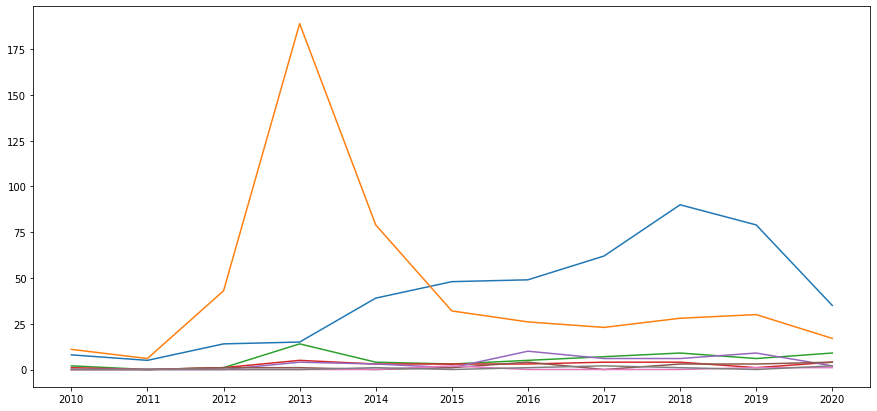

In [228]:
plt.plot(uu.index,uu['0~9세'])
plt.plot(uu.index,uu['10~19세'])
plt.plot(uu.index,uu['20~29세'])
plt.plot(uu.index,uu['30~39세'])
plt.plot(uu.index,uu['40~49세'])
plt.plot(uu.index,uu['50~59세'])
plt.plot(uu.index,uu['60~69세'])
plt.plot(uu.index,uu['70세 이상'])
plt.rcParams["figure.figsize"] = (25,14)
plt.title('노원구 연령별 유행성이하선염')
plt.show()


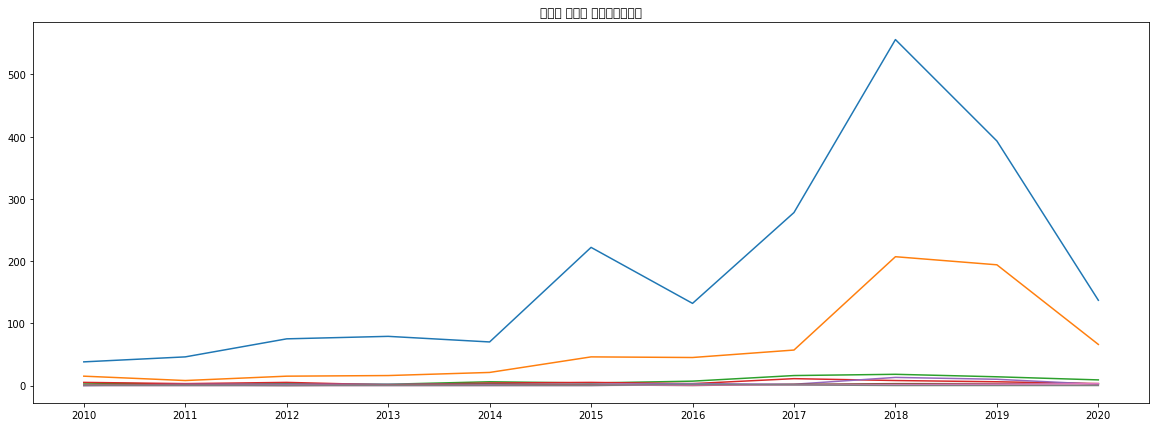

In [240]:
plt.plot(ss.index,ss['0~9세'])
plt.plot(ss.index,ss['10~19세'])
plt.plot(ss.index,ss['20~29세'])
plt.plot(ss.index,ss['30~39세'])
plt.plot(ss.index,ss['40~49세'])
plt.plot(ss.index,ss['50~59세'])
plt.plot(ss.index,ss['60~69세'])
plt.plot(ss.index,ss['70세 이상'])
plt.rcParams["figure.figsize"] = (15,7)
plt.title('노원구 연령별 유행성이하선염')
plt.show()


In [204]:
noone = pd.read_excel('/content/drive/My Drive/노원구_수두_유행성이하선염.xlsx',encoding="cp949")
col = ['연령', '성별', '2010', '2011', '2012', '2013', '2014', '2015', '2016','2017', '2018', '2019', '2020', '병']
noone.columns = col

In [158]:
df = noone[noone['연령'] != '계'][noone['성별']=='계']
df

,연령,성별,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,병
0,계,계,63,62,100,101,106,280,193,368,806,622,223,수두
3,0~9세,계,38,46,75,79,70,222,132,278,556,393,137,수두
6,10~19세,계,15,8,15,16,21,46,45,57,207,194,66,수두
9,20~29세,계,4,2,3,2,6,4,7,16,18,14,9,수두
12,30~39세,계,5,3,5,1,4,5,3,11,8,6,3,수두
15,40~49세,계,0,2,2,2,2,2,3,2,13,10,2,수두
18,50~59세,계,1,1,0,1,3,1,0,2,3,3,3,수두
21,60~69세,계,0,0,0,0,0,0,1,1,1,2,3,수두
24,70세 이상,계,0,0,0,0,0,0,2,1,0,0,0,수두
27,계,계,22,11,60,228,129,90,98,104,141,129,74,유행성이하선염
